In [1]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')
    os.environ["GOOGLE_CLOUD_PROJECT"] = "trading-290017"
else:
    print('the credential.json file does not exist')

import importlib

In [2]:
import logging, sys

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s",
    handlers=[
        logging.StreamHandler(sys.stdout)
    ]
)

In [3]:
import pandas as pd
import numpy as np

2024-12-13 10:53:13,397 [MainThread  ] [INFO ]  NumExpr defaulting to 8 threads.


In [4]:
import market_data.ingest.bq.cache
importlib.reload(market_data.ingest.bq.cache)

<module 'market_data.ingest.bq.cache' from '/Users/junlim/projects/jitter_recovery/market_data/ingest/bq/cache.py'>

In [19]:
import market_data
import market_data.ingest.bq.common
import market_data.ingest.bq.candle
dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX
export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE
t_id = market_data.ingest.bq.common.get_full_table_id(dataset_mode, export_mode)
date_str_from='2024-11-20'
date_str_to='2024-11-21'
df = market_data.ingest.bq.candle.fetch_minute_candle(t_id, aggregation_mode=market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST, date_str_from=date_str_from, date_str_to=date_str_to)


    WITH LATEST AS (
    SELECT timestamp, symbol, max(ingestion_timestamp) AS max_ingestion_timestamp
    FROM `trading-290017.market_data_okx.by_minute` 
    WHERE TRUE
    AND timestamp >= "2024-11-20T00:00:00-0500"
    AND timestamp < "2024-11-21T00:00:00-0500"
    GROUP BY timestamp, symbol
    )

    SELECT T.timestamp, T.symbol, open, high, low, close, volume
    FROM `trading-290017.market_data_okx.by_minute` AS T JOIN 
        LATEST ON T.timestamp = LATEST.timestamp AND T.symbol = LATEST.symbol 
        AND IFNULL(T.ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008")) = IFNULL(LATEST.max_ingestion_timestamp, PARSE_TIMESTAMP("%c", "Thu Dec 25 07:30:00 2008"))
    WHERE TRUE
    AND T.timestamp >= "2024-11-20T00:00:00-0500"
    AND T.timestamp < "2024-11-21T00:00:00-0500"
    ORDER BY T.timestamp ASC




KeyboardInterrupt



In [22]:
import market_data.ingest.bq.cache

df = market_data.ingest.bq.cache.read_from_cache(
    label = 'market_data',
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    aggregation_mode = market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST,
    date_str_from='2024-11-20',
    date_str_to='2024-11-21',
)

In [23]:
df

,symbol,open,high,low,close,volume
timestamp,,,,,,
2024-11-20 00:00:00-05:00,ATOM-USDT-SWAP,6.348000,6.352000,6.335000,6.343000,6784.0000
2024-11-20 00:00:00-05:00,SLP-USDT-SWAP,0.003183,0.003185,0.003181,0.003185,741880.0000
2024-11-20 00:00:00-05:00,ZRX-USDT-SWAP,0.416100,0.416400,0.415500,0.416400,21980.0000
2024-11-20 00:00:00-05:00,BCH-USDT-SWAP,436.400000,436.900000,436.000000,436.500000,344.6400
2024-11-20 00:00:00-05:00,UXLINK-USDT-SWAP,0.588200,0.588800,0.587400,0.588400,54680.0000
...,...,...,...,...,...,...
2024-11-20 23:59:00-05:00,MAGIC-USDT-SWAP,0.401400,0.401400,0.400600,0.400800,11467.0000
2024-11-20 23:59:00-05:00,ONT-USDT-SWAP,0.218700,0.219100,0.218600,0.218700,91450.0000
2024-11-20 23:59:00-05:00,BCH-USD-SWAP,495.700000,497.100000,493.800000,496.400000,82.0277


In [114]:
df_coin = df[df.symbol == "ETH-USDT-SWAP"]
df_coin_short = df_btc.iloc[:20]

In [115]:
df_coin_short.index

DatetimeIndex(['2024-11-20 00:00:00-05:00', '2024-11-20 00:01:00-05:00',
               '2024-11-20 00:02:00-05:00', '2024-11-20 00:03:00-05:00',
               '2024-11-20 00:04:00-05:00', '2024-11-20 00:05:00-05:00',
               '2024-11-20 00:06:00-05:00', '2024-11-20 00:07:00-05:00',
               '2024-11-20 00:08:00-05:00', '2024-11-20 00:09:00-05:00',
               '2024-11-20 00:10:00-05:00', '2024-11-20 00:11:00-05:00',
               '2024-11-20 00:12:00-05:00', '2024-11-20 00:13:00-05:00',
               '2024-11-20 00:14:00-05:00', '2024-11-20 00:15:00-05:00',
               '2024-11-20 00:16:00-05:00', '2024-11-20 00:17:00-05:00',
               '2024-11-20 00:18:00-05:00', '2024-11-20 00:19:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='timestamp', freq=None)

In [116]:
df0 = df_coin_short.index.searchsorted(df_btc_short.index - pd.Timedelta(minutes=10))

In [117]:
df0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
df_coin_short.index[df0[df0>0]-1]

DatetimeIndex(['2024-11-20 00:00:00-05:00', '2024-11-20 00:01:00-05:00',
               '2024-11-20 00:02:00-05:00', '2024-11-20 00:03:00-05:00',
               '2024-11-20 00:04:00-05:00', '2024-11-20 00:05:00-05:00',
               '2024-11-20 00:06:00-05:00', '2024-11-20 00:07:00-05:00',
               '2024-11-20 00:08:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='timestamp', freq=None)

In [119]:
g_raw = df_coin["close"]

In [120]:
g_raw.diff()

timestamp
2024-11-20 00:00:00-05:00     NaN
2024-11-20 00:01:00-05:00   -0.19
2024-11-20 00:02:00-05:00   -3.20
2024-11-20 00:03:00-05:00   -4.53
2024-11-20 00:04:00-05:00    1.41
                             ... 
2024-11-20 23:55:00-05:00    4.96
2024-11-20 23:56:00-05:00    6.47
2024-11-20 23:57:00-05:00   -1.90
2024-11-20 23:58:00-05:00   -0.64
2024-11-20 23:59:00-05:00   -0.50
Name: close, Length: 1302, dtype: float64

In [125]:
h = g_raw.iloc[0] * 0.01

In [126]:
def get_t_events(g_raw_, h):
    t_events, s_pos, s_neg = [], 0, 0
    diff = g_raw.diff()
    for i in diff.index[1:]:
        s_pos = max(0, s_pos + diff.loc[i])
        s_neg = min(0, s_neg + diff.loc[i])
        if s_neg < -h:
            s_neg = 0
            t_events.append(i)
        elif s_pos > h:
            s_pos = 0
            t_events.append(i)

    events = pd.DatetimeIndex(t_events)
    return events

In [211]:
t_events = get_t_events(g_raw, h)

In [212]:
t_events

DatetimeIndex(['2024-11-20 03:26:00-05:00', '2024-11-20 06:07:00-05:00',
               '2024-11-20 08:18:00-05:00', '2024-11-20 09:06:00-05:00',
               '2024-11-20 09:23:00-05:00', '2024-11-20 09:39:00-05:00',
               '2024-11-20 10:54:00-05:00', '2024-11-20 11:16:00-05:00',
               '2024-11-20 12:19:00-05:00', '2024-11-20 13:20:00-05:00',
               '2024-11-20 14:22:00-05:00', '2024-11-20 14:47:00-05:00',
               '2024-11-20 15:46:00-05:00', '2024-11-20 20:23:00-05:00',
               '2024-11-20 21:11:00-05:00', '2024-11-20 22:06:00-05:00',
               '2024-11-20 22:28:00-05:00', '2024-11-20 23:28:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [129]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='timestamp', ylabel='Price'>

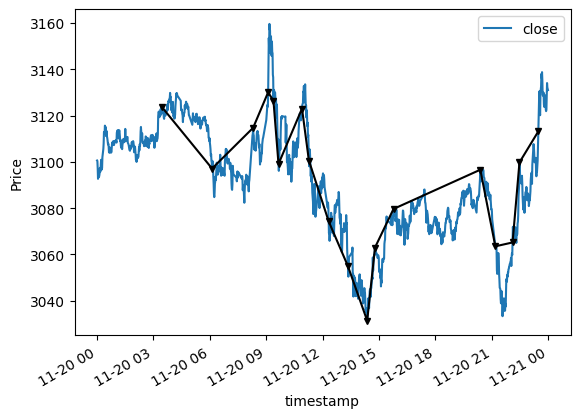

In [213]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price')

df_coin[['close']].plot(ax=ax1)
df_coin.loc[t_events]['close'].plot(ax=ax1, marker="v", markersize=5, color='k')

In [ ]:
def get_events(close, t_events, pt_sl, trgt, min_ret, t1=False):
    trgt = trgt.loc[t_events]
    trgt = trgt[trgt > min_ret]
    if t1 is False:
        t1 = pd.Series(pd.NaT, index=t_events)
    side_ = pd.Series(1.,index=trgt.index)
    events

In [149]:
events_tf = pd.DataFrame(events, index=events, columns=["t0"])
events_tf['t1'] = events_tf.t0 + pd.Timedelta(minutes=30)
events_tf['trgt'] = 0.001
events_tf['side'] = 1

In [150]:
ptSl = [1, 1]
close = g_raw

In [151]:
events_ = events_tf.copy()
out=events_[["t1"]].copy(deep=True)

if ptS1[0] > 0:
    pt = ptSl[0] * events_['trgt']
else:
    pt = pd.Series(index=events_.index)

if ptS1[1] > 0:
    sl = -ptSl[1] * events_['trgt']
else:
    sl = pd.Series(index=events_.index)


In [152]:
loc = events_.index[0]
t1 = events_.iloc[0].t1

In [153]:
df0 = close[loc:t1]
df0 = (df0/close[loc]-1)

In [155]:
sl[loc]

-0.001

In [208]:
def apply_pt_sl_on_t1(close, events, ptSl):
    events_ = events_tf.copy()
    out=events_[["t1"]].copy(deep=True)
    if ptS1[0] > 0:
        pt = ptSl[0] * events_['trgt']
    else:
        pt = pd.Series(index=events_.index)

    if ptS1[1] > 0:
        sl = -ptSl[1] * events_['trgt']
    else:
        sl = pd.Series(index=events_.index)

    for loc, t1 in events_['t1'].fillna(close.index[-1]).items():
        df0=close[loc:t1]
        df0=(df0/close[loc]-1) * events_.at[loc, 'side']
        out.loc[loc, 'sl'] = df0[df0 < sl[loc]].index.min()
        out.loc[loc, 'pt'] = df0[df0 > pt[loc]].index.min()

    out = out[out.t1 <= events_.index[-1]]    
    return out

In [209]:
out = apply_pt_sl_on_t1(g_raw, events, ptSl)

In [210]:
out

,t1,sl,pt
2024-11-20 03:26:00-05:00,2024-11-20 03:56:00-05:00,2024-11-20 03:33:00-05:00,2024-11-20 03:51:00-05:00
2024-11-20 06:07:00-05:00,2024-11-20 06:37:00-05:00,2024-11-20 06:11:00-05:00,2024-11-20 06:08:00-05:00
2024-11-20 08:18:00-05:00,2024-11-20 08:48:00-05:00,2024-11-20 08:20:00-05:00,NaT
2024-11-20 09:06:00-05:00,2024-11-20 09:36:00-05:00,2024-11-20 09:23:00-05:00,2024-11-20 09:07:00-05:00
2024-11-20 09:23:00-05:00,2024-11-20 09:53:00-05:00,2024-11-20 09:32:00-05:00,2024-11-20 09:24:00-05:00
2024-11-20 09:39:00-05:00,2024-11-20 10:09:00-05:00,2024-11-20 10:09:00-05:00,2024-11-20 09:42:00-05:00
2024-11-20 10:54:00-05:00,2024-11-20 11:24:00-05:00,2024-11-20 11:08:00-05:00,2024-11-20 10:58:00-05:00
2024-11-20 11:16:00-05:00,2024-11-20 11:46:00-05:00,2024-11-20 11:21:00-05:00,2024-11-20 11:19:00-05:00
2024-11-20 12:19:00-05:00,2024-11-20 12:49:00-05:00,2024-11-20 12:20:00-05:00,2024-11-20 12:27:00-05:00
2024-11-20 13:20:00-05:00,2024-11-20 13:50:00-05:00,2024-11-20 13:22:00-05:00,2024-11-20 13:24:00-05:00


<AxesSubplot:xlabel='timestamp', ylabel='Price'>

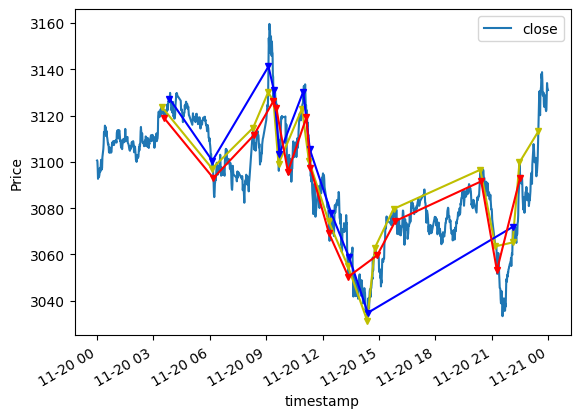

In [230]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price')


idx=df_coin.index.union(out.t1).drop_duplicates()
close=df_coin[['close']].reindex(idx, method='bfill')

close.plot(ax=ax1)
df_coin.loc[events_.t0]['close'].plot(ax=ax1, marker="v", markersize=5, color='y')

iset = set(df_coin.index)
t1_plot = [t1 for t1 in out.t1 if t1 in iset]
pt_plot = [pt for pt in out.pt if pt in iset]
sl_plot = [sl for sl in out.sl if sl in iset]
#df_coin.loc[t1_plot]['close'].plot(ax=ax1, marker="v", markersize=5, color='r')
close.loc[pt_plot]['close'].plot(ax=ax1, marker="v", markersize=5, color='b')
close.loc[sl_plot]['close'].plot(ax=ax1, marker="v", markersize=5, color='r')

In [216]:
events_ = events_tf.dropna(subset=['t1'])
px=events_.index.union(events_['t1'].values).drop_duplicates()
px=close.reindex(px, method='bfill')

In [217]:
events_

,t0,t1,trgt,side
2024-11-20 03:26:00-05:00,2024-11-20 03:26:00-05:00,2024-11-20 03:56:00-05:00,0.001,1
2024-11-20 06:07:00-05:00,2024-11-20 06:07:00-05:00,2024-11-20 06:37:00-05:00,0.001,1
2024-11-20 08:18:00-05:00,2024-11-20 08:18:00-05:00,2024-11-20 08:48:00-05:00,0.001,1
2024-11-20 09:06:00-05:00,2024-11-20 09:06:00-05:00,2024-11-20 09:36:00-05:00,0.001,1
2024-11-20 09:23:00-05:00,2024-11-20 09:23:00-05:00,2024-11-20 09:53:00-05:00,0.001,1
2024-11-20 09:39:00-05:00,2024-11-20 09:39:00-05:00,2024-11-20 10:09:00-05:00,0.001,1
2024-11-20 10:54:00-05:00,2024-11-20 10:54:00-05:00,2024-11-20 11:24:00-05:00,0.001,1
2024-11-20 11:16:00-05:00,2024-11-20 11:16:00-05:00,2024-11-20 11:46:00-05:00,0.001,1
2024-11-20 12:19:00-05:00,2024-11-20 12:19:00-05:00,2024-11-20 12:49:00-05:00,0.001,1
2024-11-20 13:20:00-05:00,2024-11-20 13:20:00-05:00,2024-11-20 13:50:00-05:00,0.001,1
